<a href="https://colab.research.google.com/github/Deep-Learning-Assignment/Deep-Learning-Project/blob/IT21156656/IT21156656.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install kaggle
!pip install opendatasets --upgrade --quiet
!pip install tensorflow

In [3]:
import pandas as pd
import os
import opendatasets as od

In [4]:
!mkdir -p ~/.kaggle

In [5]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d gayashandeshapriya/tomato-disease-dataset -p /content/drive/MyDrive/datasets --force

Dataset URL: https://www.kaggle.com/datasets/gayashandeshapriya/tomato-disease-dataset
License(s): unknown
 54% 8.00M/14.8M [00:00<00:00, 82.2MB/s]
100% 14.8M/14.8M [00:00<00:00, 89.1MB/s]


In [8]:
!unzip /content/drive/MyDrive/datasets/tomato-disease-dataset.zip -d /content/drive/MyDrive/datasets/

Archive:  /content/drive/MyDrive/datasets/tomato-disease-dataset.zip
  inflating: /content/drive/MyDrive/datasets/Tomato___bacterial_spot/2282.jpg  
  inflating: /content/drive/MyDrive/datasets/Tomato___bacterial_spot/2283.jpg  
  inflating: /content/drive/MyDrive/datasets/Tomato___bacterial_spot/2284.jpg  
  inflating: /content/drive/MyDrive/datasets/Tomato___bacterial_spot/2285.jpg  
  inflating: /content/drive/MyDrive/datasets/Tomato___bacterial_spot/2286.jpg  
  inflating: /content/drive/MyDrive/datasets/Tomato___bacterial_spot/2287.jpg  
  inflating: /content/drive/MyDrive/datasets/Tomato___bacterial_spot/2288.jpg  
  inflating: /content/drive/MyDrive/datasets/Tomato___bacterial_spot/2289.jpg  
  inflating: /content/drive/MyDrive/datasets/Tomato___bacterial_spot/2290.jpg  
  inflating: /content/drive/MyDrive/datasets/Tomato___bacterial_spot/2291.jpg  
  inflating: /content/drive/MyDrive/datasets/Tomato___bacterial_spot/2292.jpg  
  inflating: /content/drive/MyDrive/datasets/Tomato

In [9]:
import os

# Check the contents of the dataset
dataset_dir = "/content/drive/MyDrive/datasets/"
print(os.listdir(dataset_dir))


['tomato-disease-dataset.zip', 'Tomato___bacterial_spot', 'Tomato___early_blight', 'Tomato___healthy', 'Tomato___late_blight', 'Tomato___leaf_curl', 'Tomato___leaf_mold', 'Tomato___mosaic_virus', 'Tomato___septoria_leaf_spot', 'Tomato___spider_mites', 'train', 'val', 'test']


In [10]:
# Set the training and validation directories
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

# Optional: Test directory (if provided)
test_dir = os.path.join(dataset_dir, 'test')

# Print to ensure paths are set correctly
print("Training directory:", train_dir)
print("Validation directory:", val_dir)
print("Test directory:", test_dir)

Training directory: /content/drive/MyDrive/datasets/train
Validation directory: /content/drive/MyDrive/datasets/val
Test directory: /content/drive/MyDrive/datasets/test


In [11]:
import os

# Base directory where the dataset exists
base_dir = '/content/drive/MyDrive/datasets/'  # Update the path if necessary

# Define directories for train, val, test
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create the directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List of class folder names (assuming these folders already exist in the main directory)
classes = ['Tomato___bacterial_spot', 'Tomato___early_blight', 'Tomato___healthy',
           'Tomato___late_blight', 'Tomato___leaf_curl', 'Tomato___leaf_mold',
           'Tomato___mosaic_virus', 'Tomato___septoria_leaf_spot', 'Tomato___spider_mites']

# Create subdirectories for each class in train, val, test
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)


In [12]:
import shutil
import random

# Define the split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Loop over each class folder to split the images
for class_name in classes:
    # Path to the original folder with all images of the class
    source_dir = os.path.join(base_dir, class_name)

    # Get all the images in the folder
    all_images = os.listdir(source_dir)

    # Shuffle the images randomly
    random.shuffle(all_images)

    # Calculate the number of images for each split
    total_images = len(all_images)
    train_images = int(train_ratio * total_images)
    val_images = int(val_ratio * total_images)

    # Split the images
    train_files = all_images[:train_images]
    val_files = all_images[train_images:train_images + val_images]
    test_files = all_images[train_images + val_images:]

    # Move the images to the corresponding directories
    for file_name in train_files:
        src = os.path.join(source_dir, file_name)
        dst = os.path.join(train_dir, class_name, file_name)
        shutil.move(src, dst)

    for file_name in val_files:
        src = os.path.join(source_dir, file_name)
        dst = os.path.join(val_dir, class_name, file_name)
        shutil.move(src, dst)

    for file_name in test_files:
        src = os.path.join(source_dir, file_name)
        dst = os.path.join(test_dir, class_name, file_name)
        shutil.move(src, dst)


In [13]:
# Check how many images are in each folder
for class_name in classes:
    print(f"Class {class_name} - Training Images: {len(os.listdir(os.path.join(train_dir, class_name)))}")
    print(f"Class {class_name} - Validation Images: {len(os.listdir(os.path.join(val_dir, class_name)))}")
    print(f"Class {class_name} - Test Images: {len(os.listdir(os.path.join(test_dir, class_name)))}")


Class Tomato___bacterial_spot - Training Images: 99
Class Tomato___bacterial_spot - Validation Images: 35
Class Tomato___bacterial_spot - Test Images: 21
Class Tomato___early_blight - Training Images: 80
Class Tomato___early_blight - Validation Images: 30
Class Tomato___early_blight - Test Images: 19
Class Tomato___healthy - Training Images: 46
Class Tomato___healthy - Validation Images: 18
Class Tomato___healthy - Test Images: 11
Class Tomato___late_blight - Training Images: 101
Class Tomato___late_blight - Validation Images: 39
Class Tomato___late_blight - Test Images: 24
Class Tomato___leaf_curl - Training Images: 218
Class Tomato___leaf_curl - Validation Images: 84
Class Tomato___leaf_curl - Test Images: 49
Class Tomato___leaf_mold - Training Images: 84
Class Tomato___leaf_mold - Validation Images: 32
Class Tomato___leaf_mold - Test Images: 20
Class Tomato___mosaic_virus - Training Images: 49
Class Tomato___mosaic_virus - Validation Images: 18
Class Tomato___mosaic_virus - Test Ima

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create image generators for training and validation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
val_datagen = ImageDataGenerator(rescale=1./255)

    # Flow from directory for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,  # This now uses the corrected train_dir
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

Found 814 images belonging to 9 classes.
Found 309 images belonging to 9 classes.


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [17]:
from tensorflow.keras.applications import ResNet50

# Load ResNet50 pre-trained on ImageNet, without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add custom classifier
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  # 9 classes for tomato diseases
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20  # Start with 20 epochs and adjust as necessary
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 310s 12s/step - accuracy: 0.1714 - loss: 19.6220 - val_accuracy: 0.2778 - val_loss: 2.1117
Epoch 2/20
 1/25 ━━━━━━━━━━━━━━━━━━━━ 2:59 7s/step - accuracy: 0.1875 - loss: 2.0997

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 244ms/step - accuracy: 0.1875 - loss: 2.0997 - val_accuracy: 0.1905 - val_loss: 2.2002
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 290s 11s/step - accuracy: 0.1615 - loss: 2.2141 - val_accuracy: 0.2465 - val_loss: 2.1857
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 305ms/step - accuracy: 0.3750 - loss: 2.1898 - val_accuracy: 0.4762 - val_loss: 2.1781
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 279s 11s/step - accuracy: 0.2635 - loss: 2.1926 - val_accuracy: 0.2674 - val_loss: 2.1697
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.3438 - loss: 2.1721 - val_accuracy: 0.3333 - val_loss: 2.1674
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 288s 11s/step - accuracy: 0.2499 - loss: 2.2109 - val_accuracy: 0.2847 - val_loss: 2.1666
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.3750 - loss: 2.1685 - val_accuracy: 0.0952 - val_loss: 2.1715
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 299s 11s/step - accuracy: 0.2987 - loss: 2.1670 - val_accuracy: 0.2847 - 

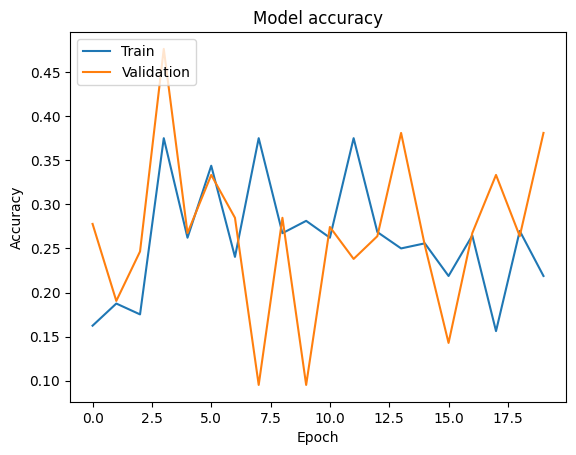

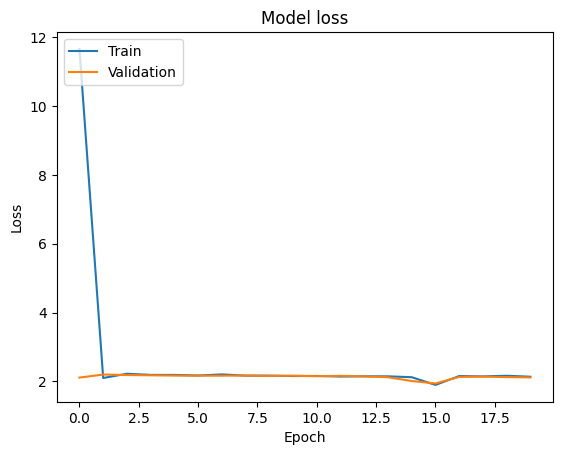

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
